***

>

#### Importing All Necessary Packages

In [ ]:

#Triloshna Velaga
#L20581568
import seaborn as sns
from tensorflow.keras import Sequential, layers
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
import pandas as pd
import tensorflow as tf


In [ ]:
pip install imblearn

#### Load Dataset

In [ ]:
# Loading MNIST dataset
mnist_data = keras.datasets.mnist.load_data()

# Splitting the dataset into train and test sets
(train_images, train_labels), (test_images, test_labels) = mnist_data

# Merging both train and test data into a single dataset
images = np.concatenate((train_images, test_images))
labels = np.concatenate((train_labels, test_labels))

# Displaying the shape of the dataset
print('\nDataset loaded successfully..')
print('Total number of samples in the dataset:', images.shape[0])
print('Shape of images in the dataset:', images.shape[1:])

# Displaying labels and their counts
print('\nLabels and number of samples per label:')
pd.DataFrame({'Labels': np.unique(labels, return_counts=True)[0],
              'Counts': np.unique(labels, return_counts=True)[1]})

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Dataset loaded successfully..
Total number of samples in the dataset: 70000
Shape of images in the dataset: (28, 28)

Labels and number of samples per label:


,Labels,Counts
0,0,6903
1,1,7877
2,2,6990
3,3,7141
4,4,6824
5,5,6313
6,6,6876
7,7,7293
8,8,6825
9,9,6958


In [ ]:
pip install pandas

#### Handling Imbalanced Data

In [ ]:
# Reshaping the image data
reshaped_images = images.reshape(images.shape[0], 28 * 28)

# Balancing the dataset using Random Oversampling
balanced_images, balanced_labels = RandomOverSampler().fit_resample(reshaped_images, labels)

# Reshaping the data back to the image dimensions (28x28 with 1 channel)
balanced_images = balanced_images.reshape(balanced_images.shape[0], 28, 28, 1)

print('\nData is balanced now.')
print('Total number of samples in the dataset now:', balanced_images.shape[0])

# Displaying the balanced labels and their counts
print('\nLabels and number of samples per label now:')
pd.DataFrame({'Labels': np.unique(balanced_labels, return_counts=True)[0],
              'Counts': np.unique(balanced_labels, return_counts=True)[1]})



Data is balanced now.
Total number of samples in the dataset now: 78770

Labels and number of samples per label now:


,Labels,Counts
0,0,7877
1,1,7877
2,2,7877
3,3,7877
4,4,7877
5,5,7877
6,6,7877
7,7,7877
8,8,7877
9,9,7877


#### Spliting Data for Training and Testing

In [ ]:
# Splitting the dataset into train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(balanced_images, balanced_labels, test_size=0.2, stratify=balanced_labels, random_state=28)

print('\nTotal number of samples in the Training Dataset now:', train_images.shape[0])
print('Total number of samples in the Test Dataset now:', test_images.shape[0])

# Displaying the labels and their counts in the training dataset
print('\nLabels and number of samples per label in the train dataset now:')
pd.DataFrame({'Labels': np.unique(train_labels, return_counts=True)[0],
              'Counts': np.unique(train_labels, return_counts=True)[1]})



Total number of samples in the Training Dataset now: 63016
Total number of samples in the Test Dataset now: 15754

Labels and number of samples per label in the train dataset now:


,Labels,Counts
0,0,6302
1,1,6301
2,2,6302
3,3,6302
4,4,6301
5,5,6301
6,6,6301
7,7,6302
8,8,6302
9,9,6302


In [ ]:
# Displaying the labels and their counts in the test dataset
print('\nLabels and number of samples per label in the test dataset now:')
pd.DataFrame({'Labels': np.unique(test_labels, return_counts=True)[0],
              'Counts': np.unique(test_labels, return_counts=True)[1]})



Labels and number of samples per label in the test dataset now:


,Labels,Counts
0,0,1575
1,1,1576
2,2,1575
3,3,1575
4,4,1576
5,5,1576
6,6,1576
7,7,1575
8,8,1575
9,9,1575


#### Some Examples of Training Data

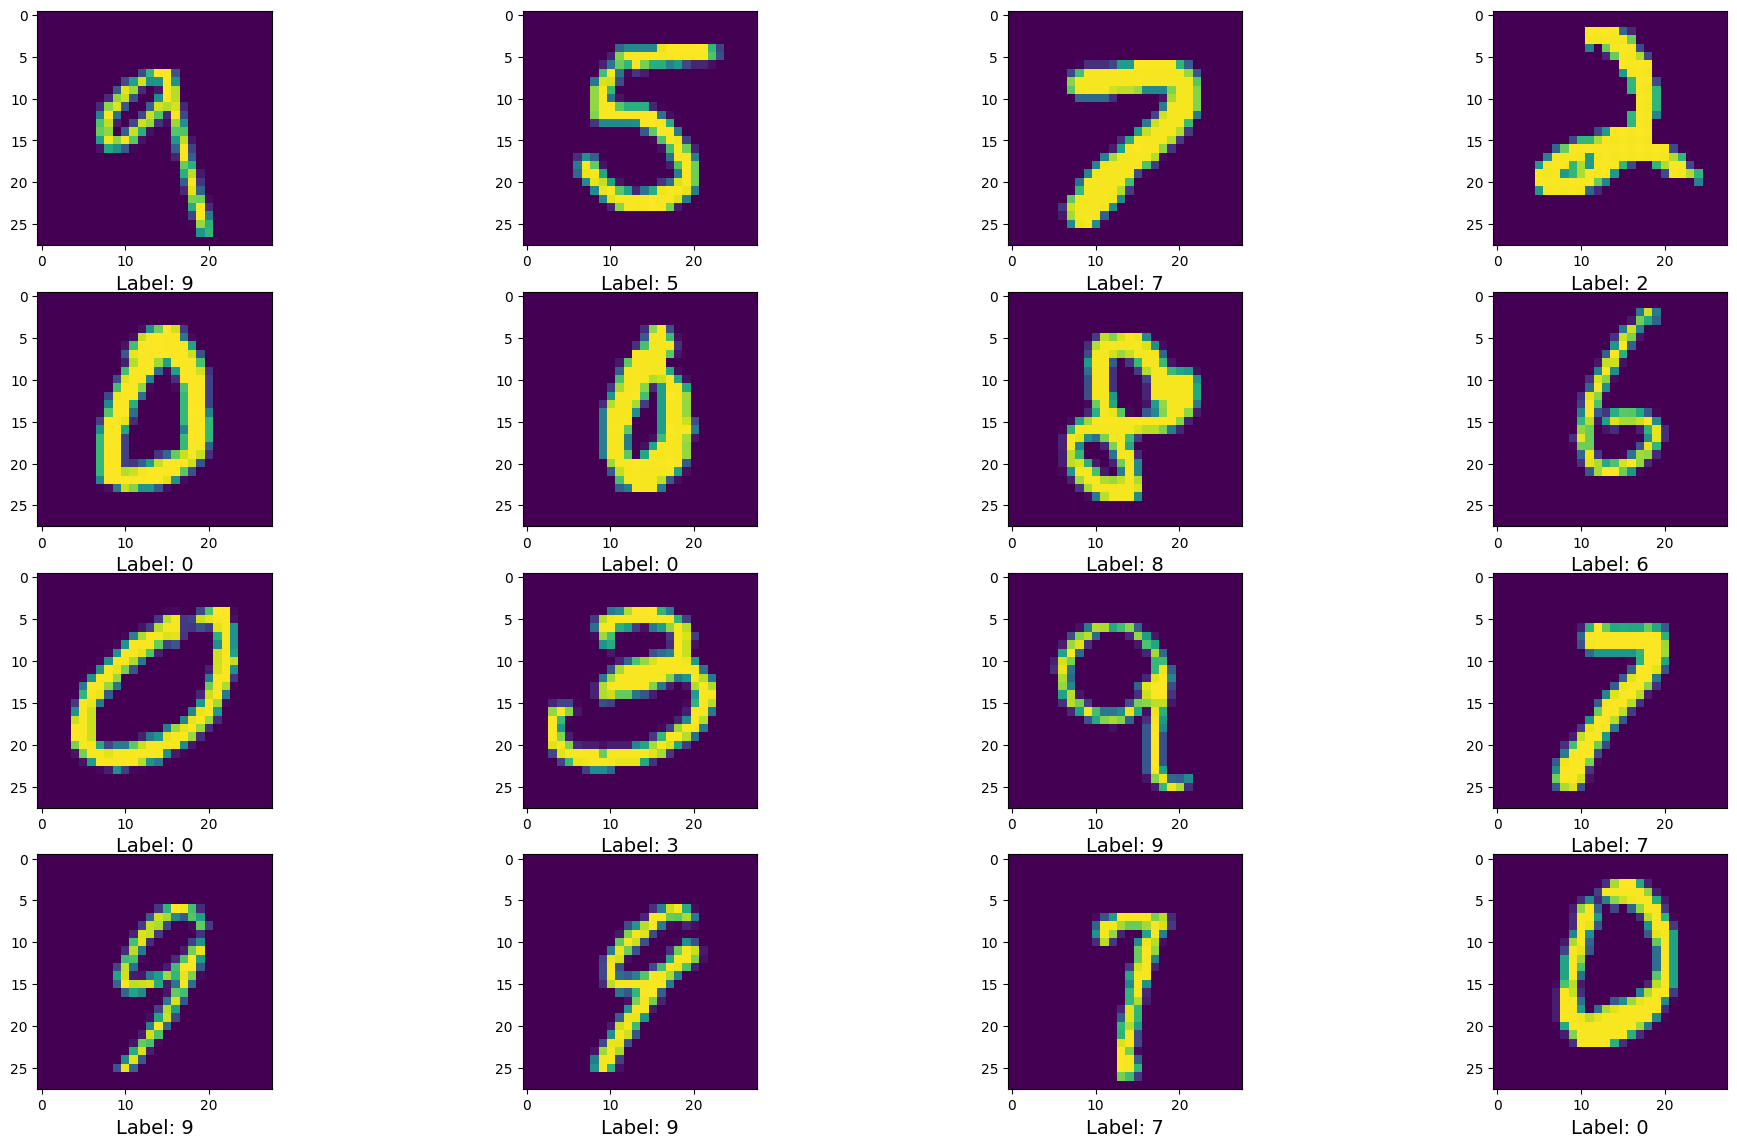

In [ ]:
input_data = xtrain
target_labels = ytrain
plt.figure(figsize=(24,14))
for idx in range(1,17):
    plt.subplot(4,4,idx)
    plt.imshow(input_data[idx])
    description = "Label: " + str(target_labels[idx])
    plt.xlabel(description, fontdict={'fontsize':14})

#### Some Examples of Testing Data

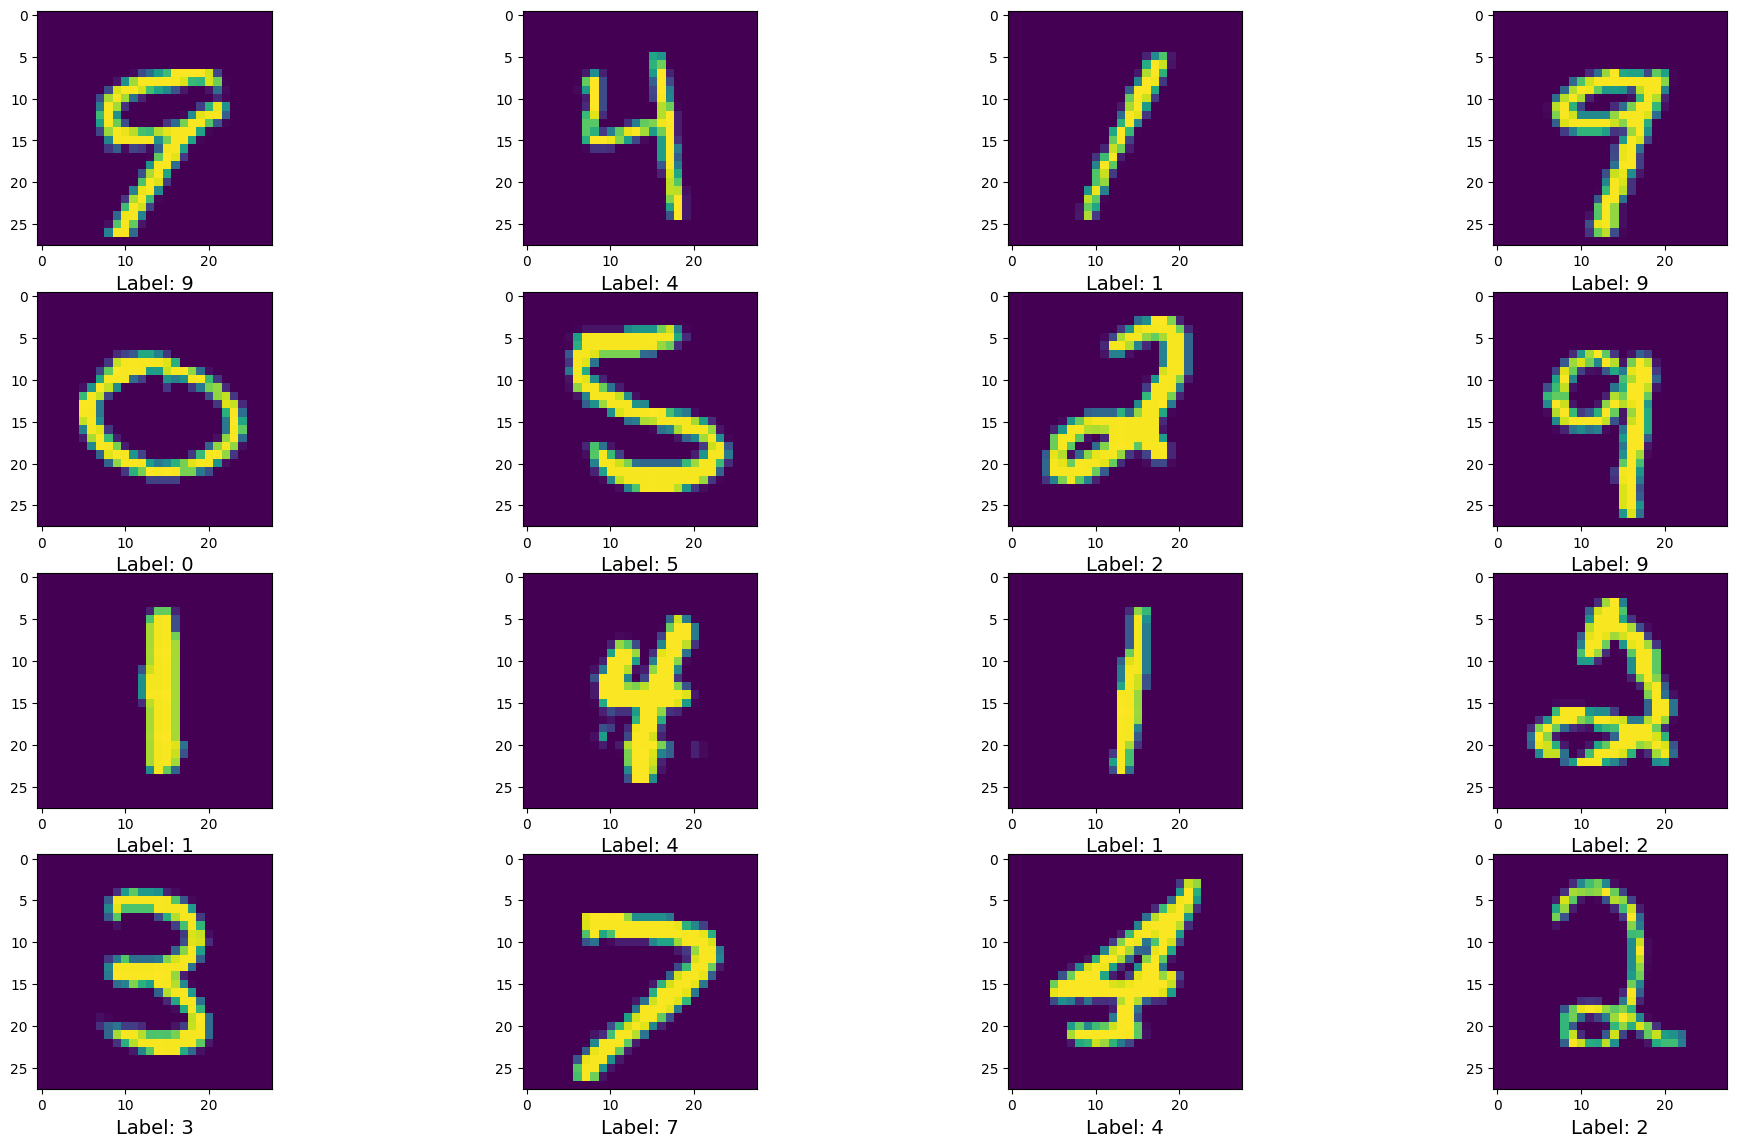

In [ ]:
test_data = xtest
test_labels = ytest
plt.figure(figsize=(24,14))
for idx in range(1,17):
    plt.subplot(4,4,idx)
    plt.imshow(test_data[idx])
    description = "Label: " + str(test_labels[idx])
    plt.xlabel(description, fontdict={'fontsize':14})


#### Categorical Encoding

In [ ]:
digits = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ytrain = keras.utils.to_categorical(ytrain)
ytest = keras.utils.to_categorical(ytest)

#### Normalization

In [ ]:
xtrain = xtrain / 255
xtest = xtest / 255

#### Developing Convolutional Neural Network Model

In [ ]:
model = Sequential(
                        [
                            # CNN Layers
                            layers.Conv2D(25,(3,3),padding='same',activation='relu',input_shape=(28,28,1)),
                            layers.MaxPooling2D((2,2)),
                            layers.Conv2D(50,(3,3),padding='same',activation='relu'),
                            layers.MaxPooling2D((2,2)),
                            layers.Conv2D(75,(3,3),padding='same',activation='relu'),
                            layers.MaxPooling2D((2,2)),
                            layers.Conv2D(100,(3,3),padding='same',activation='relu'),
                            layers.MaxPooling2D((2,2)),

                            # Flattening Data
                            layers.Flatten(),

                            # Dense Layers
                            layers.Dense(50,activation='relu'),
                            layers.Dropout(0.1),
                            layers.Dense(25,activation='relu'),
                            layers.Dropout(0.05),
                            layers.Dense(10,activation='softmax')
                        ]
                  )
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 25)          │             250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 25)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 50)          │          11,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 75)            │          33,825 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 75)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 100)           │          67,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 100)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119,560 (467.03 KB)

 Trainable params: 119,560 (467.03 KB)

 Non-trainable params: 0 (0.00 B)

#### Model Compilation and Training

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
training = model.fit(xtrain,ytrain,batch_size=20,validation_data=(xtest,ytest),epochs=10)

Epoch 1/10
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 111s 39ms/step - accuracy: 0.8269 - loss: 0.5298 - val_accuracy: 0.9781 - val_loss: 0.0717
Epoch 2/10
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 135s 36ms/step - accuracy: 0.9802 - loss: 0.0682 - val_accuracy: 0.9880 - val_loss: 0.0435
Epoch 3/10
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 103s 37ms/step - accuracy: 0.9867 - loss: 0.0490 - val_accuracy: 0.9834 - val_loss: 0.0601
Epoch 4/10
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 141s 37ms/step - accuracy: 0.9893 - loss: 0.0393 - val_accuracy: 0.9896 - val_loss: 0.0401
Epoch 5/10
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 144s 37ms/step - accuracy: 0.9911 - loss: 0.0310 - val_accuracy: 0.9871 - val_loss: 0.0479
Epoch 6/10
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 140s 37ms/step - accuracy: 0.9928 - loss: 0.0245 - val_accuracy: 0.9906 - val_loss: 0.0440
Epoch 7/10
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 101s 36ms/step - accuracy: 0.9940 - loss: 0.0205 - val_accuracy: 0.9902 - val_loss: 0.0487
Epoch 8/10
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 103s 37ms/step - accuracy: 

#### Analysis of Training History

In [ ]:
model_training = training
history_data = model_training.history
history_data['epochs'] = range(1, 11)
history_data = pd.DataFrame(history_data)
print('\nLoss and Accuracy History per Epoch:')
history_data


Loss and Accuracy History per Epoch:


,accuracy,loss,val_accuracy,val_loss,epochs
0,0.929089,0.233736,0.978071,0.071673,1
1,0.981179,0.064968,0.988000,0.043479,2
2,0.986625,0.049740,0.983429,0.060136,3
3,0.989696,0.037424,0.989571,0.040113,4
4,0.991143,0.032466,0.987071,0.047942,5
5,0.992393,0.026904,0.990571,0.044030,6
6,0.993482,0.022707,0.990214,0.048708,7
7,0.994411,0.020511,0.991643,0.041983,8
8,0.994554,0.019252,0.989714,0.051055,9
9,0.994857,0.018096,0.988643,0.051869,10


#### Visualization of Training History

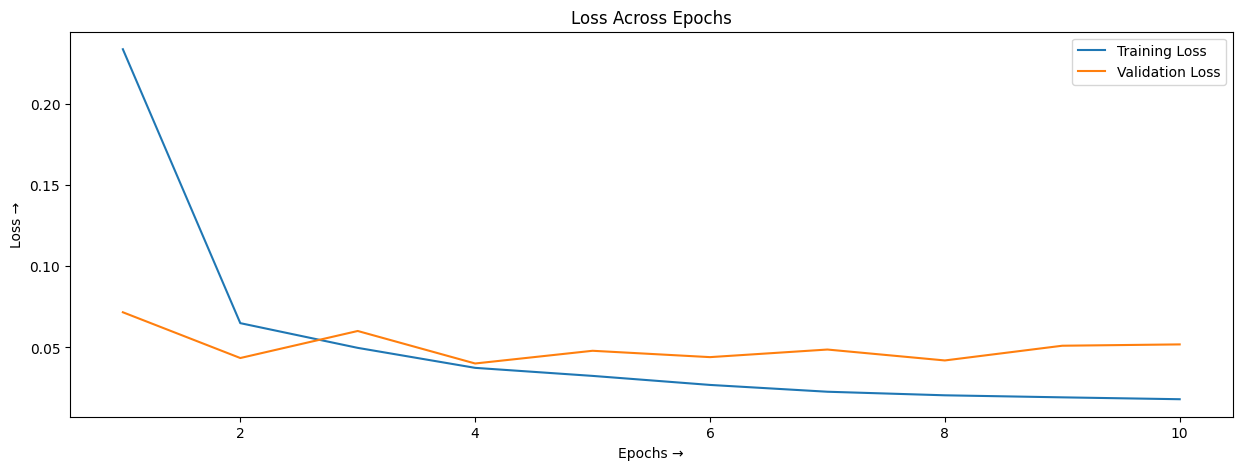

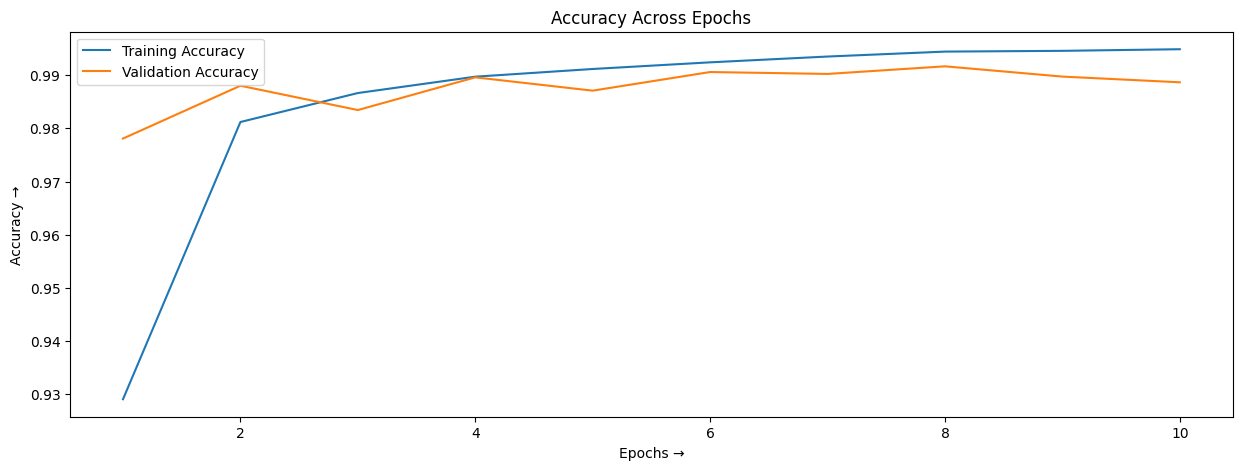

In [ ]:
# Plotting Loss Per Epoch
plt.figure(figsize=(15,5))
plt.plot(history_data['epochs'], history_data['loss'])
plt.plot(history_data['epochs'], history_data['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.title('Loss Across Epochs')
plt.xlabel('Epochs →')
plt.ylabel('Loss →')
plt.show()

# Plotting Accuracy Per Epoch
plt.figure(figsize=(15,5))
plt.plot(history_data['epochs'], history_data['accuracy'])
plt.plot(history_data['epochs'], history_data['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title('Accuracy Across Epochs')
plt.xlabel('Epochs →')
plt.ylabel('Accuracy →')
plt.show()


#### Model Performence Analysis - Confusion Metrics

In [ ]:
ytrue = np.array([np.argmax(i) for i in ytest])
ypred = np.array([np.argmax(i) for i in model.predict(xtest)])
print('\nConfusion Matrics : ')
confusion_matrix(ytrue,ypred)

438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step

Confusion Matrics : 


array([[1375,    0,    0,    1,    0,    0,    4,    1,    0,    0],
       [   0, 1568,    0,    0,    0,    1,    2,    4,    0,    0],
       [   0,    5, 1362,    8,    1,    0,    0,   14,    5,    3],
       [   0,    1,    1, 1419,    0,    5,    0,    0,    1,    1],
       [   0,    8,    0,    0, 1341,    0,    2,    2,    2,   10],
       [   0,    0,    0,    4,    0, 1249,    5,    0,    2,    3],
       [   3,    0,    0,    0,    1,    3, 1368,    0,    0,    0],
       [   1,    3,    2,    1,    0,    1,    0, 1444,    2,    5],
       [   0,    2,    0,    1,    2,    3,    7,    1, 1345,    4],
       [   0,    1,    0,    1,    6,    1,    2,    6,    4, 1370]])

#### Visualizing Confusion Metrics

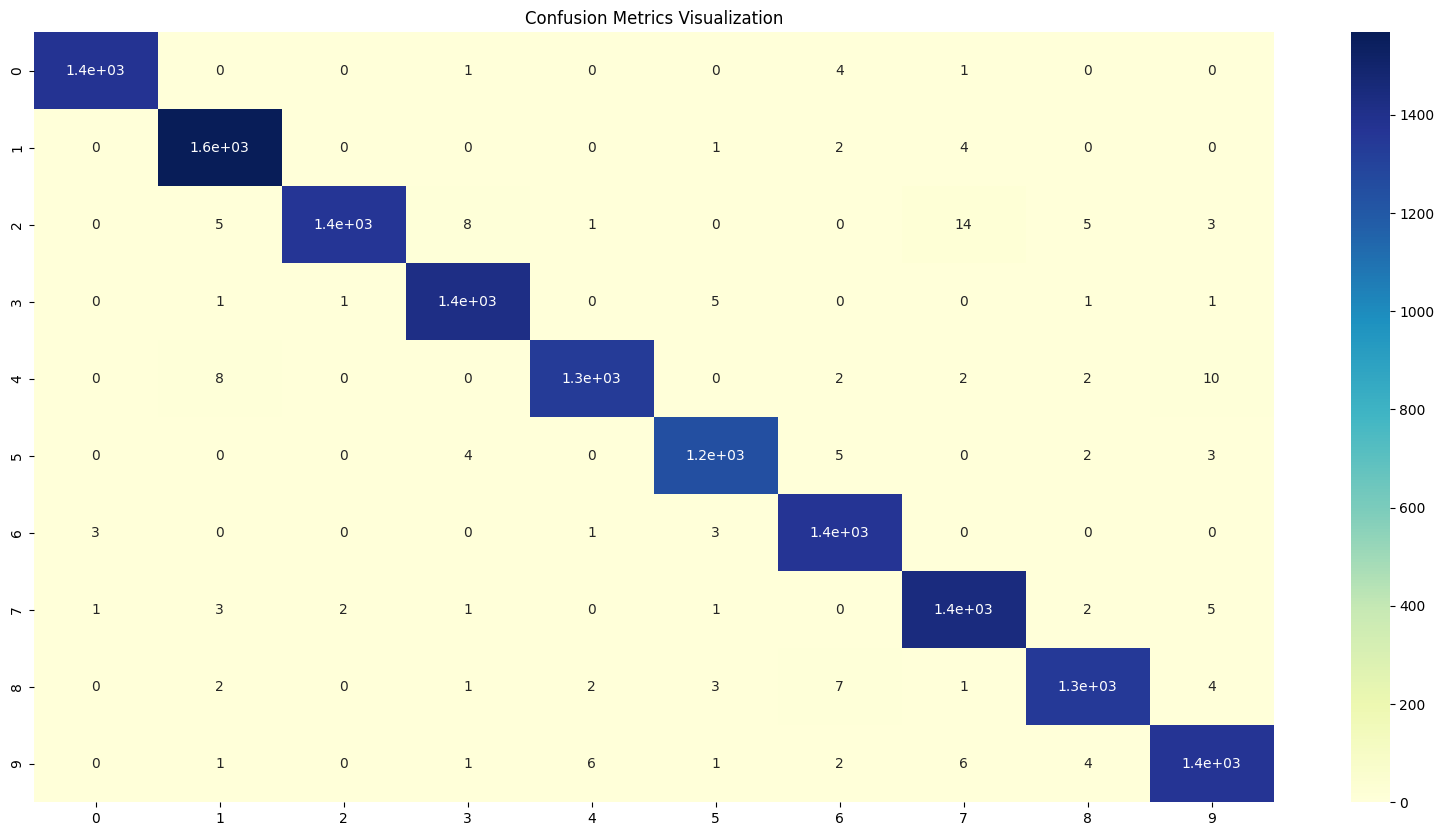

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(ytrue,ypred),annot=True,cmap='YlGnBu')
plt.title('Confusion Metrics Visualization')
plt.show()

#### Model Performence Analysis - Classification Report

In [ ]:
print('\nClassification Report : \n')
print(classification_report(ytrue,ypred))


Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1381
           1       0.99      1.00      0.99      1575
           2       1.00      0.97      0.99      1398
           3       0.99      0.99      0.99      1428
           4       0.99      0.98      0.99      1365
           5       0.99      0.99      0.99      1263
           6       0.98      0.99      0.99      1375
           7       0.98      0.99      0.99      1459
           8       0.99      0.99      0.99      1365
           9       0.98      0.98      0.98      1391

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



#### Predictions on few Samples


Predictions on few Samples :

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


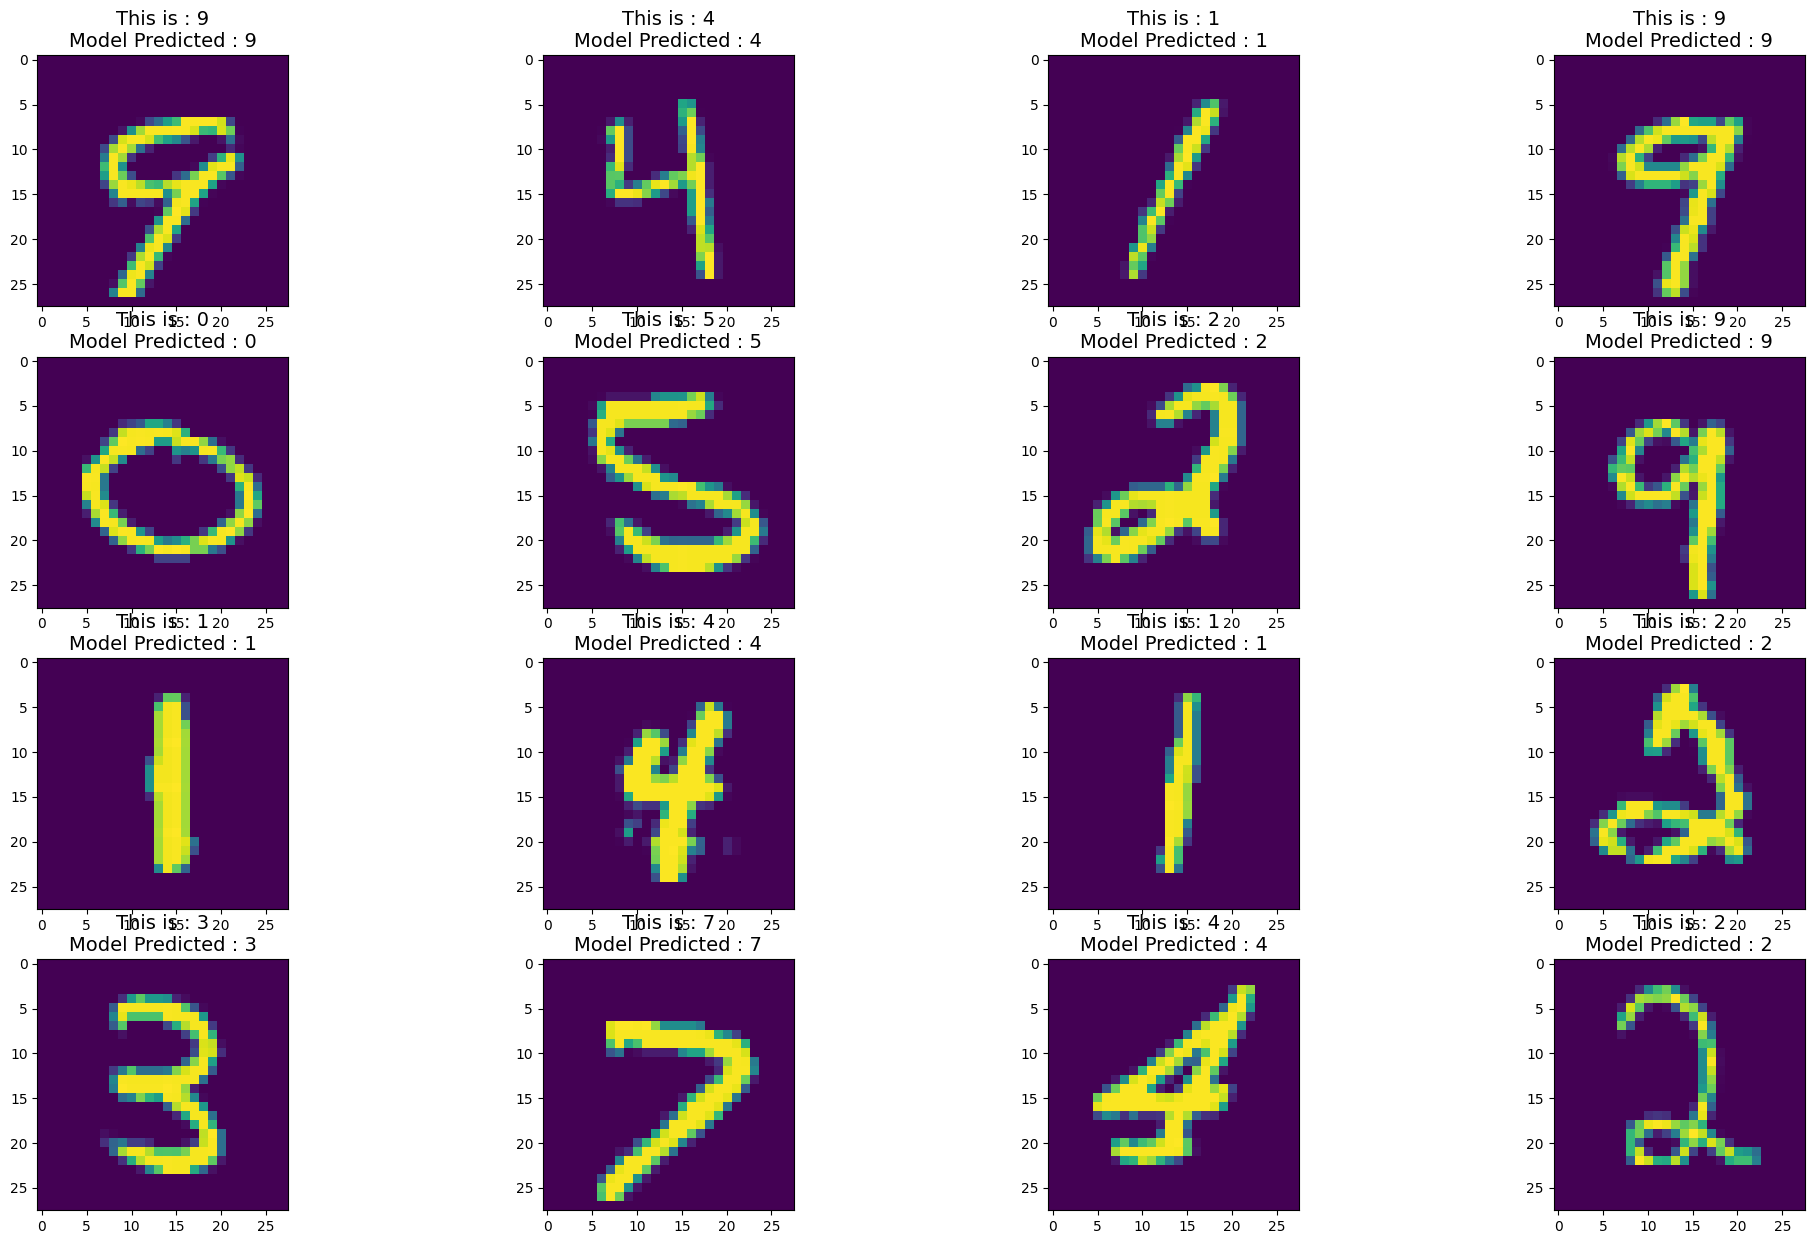

In [ ]:
plt.figure(figsize=(25,15))
print('\nPredictions on few Samples :\n')
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.imshow(xtest[i])
    prediction = np.argmax(model.predict(np.array([xtest[i]])))
    label = "This is : " + str(ytrue[i]) + '\n' + 'Model Predicted : ' + str(prediction)
    plt.title(label,fontdict={'fontsize':14})